In [3]:
### CNN모델 -Fashion_MNIST분류
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

#1: 툴 사용에 따른 변경부분
## gpus - tf.config.experimental.list_physical_devices('GPU')
## tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test /= 255.0

# expand data with channel = 1
x_train = np.expand_dims(x_train, axis = 3) #(60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=3) #(10000, 28, 28, 1)

# on-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


4422102/4422102 [==============================] - 0s 0us/step


Epoch 1/100
150/150 [==============================] - 2s 10ms/step - loss: 0.8866 - accuracy: 0.7512 - val_loss: 2.9820 - val_accuracy: 0.3692
Epoch 2/100
150/150 [==============================] - 1s 9ms/step - loss: 0.4009 - accuracy: 0.8533 - val_loss: 0.5704 - val_accuracy: 0.7975
Epoch 3/100
150/150 [==============================] - 1s 8ms/step - loss: 0.3410 - accuracy: 0.8729 - val_loss: 0.3796 - val_accuracy: 0.8634
Epoch 4/100
150/150 [==============================] - 1s 9ms/step - loss: 0.3105 - accuracy: 0.8842 - val_loss: 0.3074 - val_accuracy: 0.8892
Epoch 5/100
150/150 [==============================] - 1s 9ms/step - loss: 0.2877 - accuracy: 0.8936 - val_loss: 0.3691 - val_accuracy: 0.8732
Epoch 6/100
150/150 [==============================] - 1s 9ms/step - loss: 0.2703 - accuracy: 0.8996 - val_loss: 0.3131 - val_accuracy: 0.8897
Epoch 7/100
150/150 [==============================] - 1s 9ms/step - loss: 0.2602 - accuracy: 0.9023 - val_loss: 0.2914 - val_accuracy: 0.898

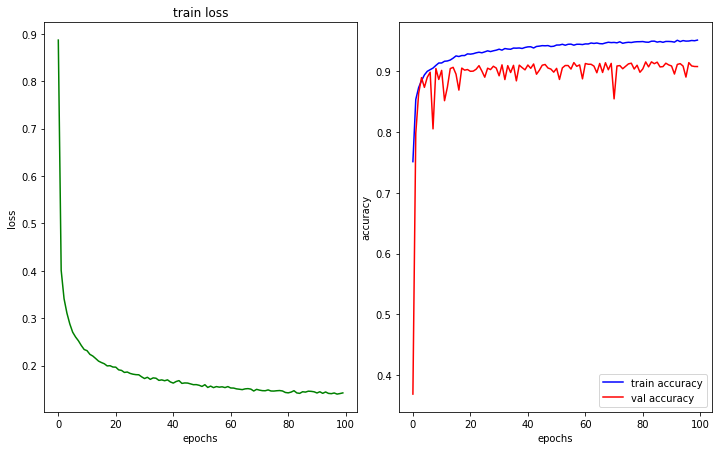

In [8]:
#3: build a sequential model
model = tf.keras.Sequential()
model.add(Input(x_train.shape[1:])) # shape=(28,28,1)
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate = 0.2))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate = 0.2))

model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

#4: train and evaluate the model
opt = RMSprop(learning_rate = 0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs = 100, batch_size = 400, 
                validation_data = (x_test, y_test), verbose =1)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)

#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'], "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'], "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
plt.show()